In [ ]:
!pip install SPARQLWrapper 
import pandas as pd
from pprint import pprint
from google.colab import files
import csv
import operator
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import numpy as np
import seaborn as sns
from SPARQLWrapper import SPARQLWrapper, JSON, POST
import  getpass
import collections
import numpy as np

Upload city data from left side bar. NB! File will be deleted after end of the session!

In [ ]:

mentions = pd.read_csv("./city_speeches_69_78.csv", sep=",")
#period = '04_13'

In [ ]:
#timespans = [['1986', '1995'],
#['1969','1978'],
#['2004','2013']] 


In [ ]:
#Nested dictionary by city

mentions_by_city= {}

for index, row in mentions.iterrows():
    city = row['kaupunki'] #check_city(row["labels"])
    if not city in mentions_by_city:
      mentions_by_city[city] ={}
    speech_year = row["päiväys"][:4]
    if not speech_year in mentions_by_city[city]:
        mentions_by_city[city][speech_year] = 0
    mentions_by_city[city][speech_year] = mentions_by_city[city][speech_year] + 1

#pprint(mentions_by_city)

In [ ]:
# Results to CSV 

all_csv =[]

for city in mentions_by_city:
    for year in mentions_by_city[city]:
      all_csv.append([city, year, mentions_by_city[city][year]])


all_csv = sorted(all_csv, key=operator.itemgetter(0, 1)) 
#pprint(all_csv[:10])

df = pd.DataFrame(all_csv, columns=['city', 'year', 'mention_count'])
#df.to_csv('city_counts_statistics_{}.csv'.format(period), index=False)


In [ ]:
# Download results
#files.download('city_counts_statistics_{}.csv'.format(period))


**Drafts for tables and other simple visualizations**
---




In [ ]:
display(df)


,city,year,mention_count
0,Alajärvi,1970,1
1,Alajärvi,1971,1
2,Alajärvi,1973,1
3,Alajärvi,1977,2
4,Alavus,1969,3
...,...,...,...
809,Äänekoski,1972,2
810,Äänekoski,1974,13
811,Äänekoski,1975,2
812,Äänekoski,1976,2


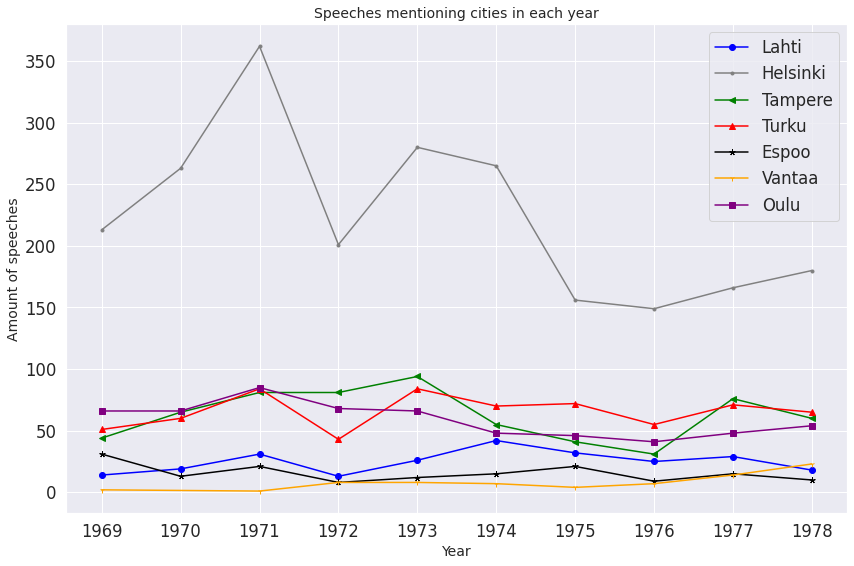

In [ ]:
# Histogram based on mentions
# Kuusikkokunnat +Lahti

dfl = df[df['city']=='Lahti']
dfh = df[df['city']=='Helsinki']
dft = df[df['city']=='Tampere']

dftu = df[df['city']=='Turku']
dfe = df[df['city']=='Espoo']
dfv = df[df['city']=='Vantaa']
dfo = df[df['city']=='Oulu']


plt.figure(figsize=(14, 9))
plt.plot(dfl['year'], dfl['mention_count'], color='blue', marker='o')
plt.plot(dfh['year'], dfh['mention_count'], color='gray', marker='.')
plt.plot(dft['year'], dft['mention_count'], color='green', marker='<')
plt.plot(dftu['year'], dftu['mention_count'], color='red', marker='^')
plt.plot(dfe['year'], dfe['mention_count'], color='black', marker=(5,2))
plt.plot(dfv['year'], dfv['mention_count'], color='orange', marker="1")
plt.plot(dfo['year'], dfo['mention_count'], color='purple', marker="s")
plt.legend(["Lahti", "Helsinki", "Tampere", "Turku", "Espoo", "Vantaa", "Oulu"])

plt.title('Speeches mentioning cities in each year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of speeches', fontsize=14)


plt.grid(True)
plt.show()

#plt.savefig("7_cities_graph_{}.png".format(period), bbox_inches = 'tight')
# does not work for some reason, notjing in saved pic


In [ ]:
#files.download("7_cities_graph_{}.png".format(period)) 

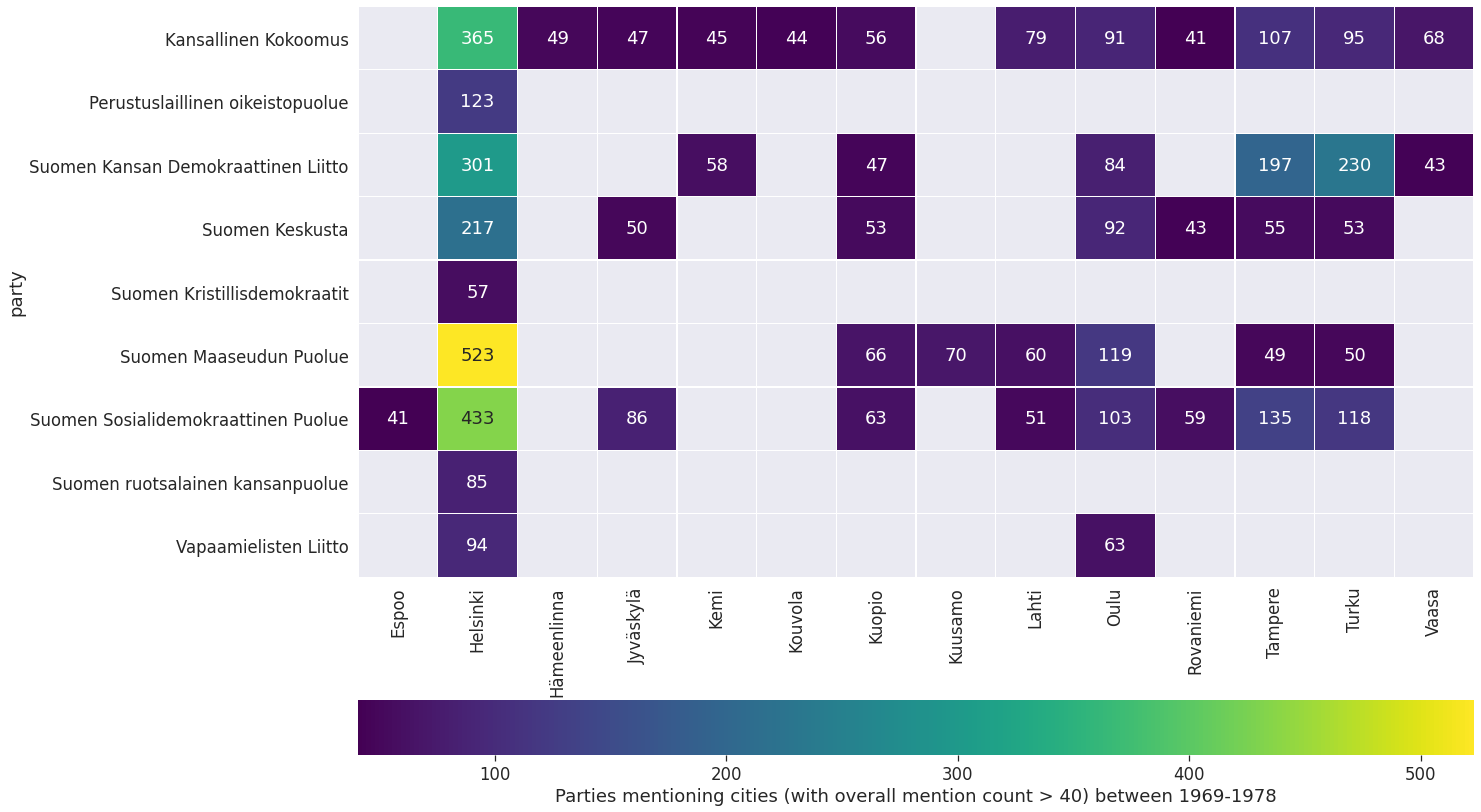

In [ ]:
# Heatmaps of city mentions by party

# COUNT PARTY-CITY COMBINATIONS #
mentions_by_party= {}
for index, row in mentions.iterrows():
    city = row['kaupunki'] #check_city(row["labels"])
    if not city in mentions_by_party:
      mentions_by_party[city] ={}
    speech_party = 'NaN' if not row['puolue'] else row['puolue']
    if not speech_party in mentions_by_party[city]:
        mentions_by_party[city][speech_party] = 0
    mentions_by_party[city][speech_party] = mentions_by_party[city][speech_party] + 1

#pprint(mentions_by_party)

# TRANSFORM PARTY-CITY DATA INTO CSV #
parties_csv =[]

for city in mentions_by_party:
    for party in mentions_by_party[city]:
      if int(mentions_by_party[city][party]) > 40: #########!!!!!!!!!!!!
        #print(city, party, mentions_by_party[city][party])
        parties_csv.append([city, party, mentions_by_party[city][party]])


parties_csv = sorted(parties_csv, key=operator.itemgetter(0, 1)) 
#pprint(parties_csv)
df_party = pd.DataFrame(parties_csv, columns=['city', 'party', 'mention_count'])
#display(df_party)

# CREATE HEATMAP #
pivoted_p= df_party.pivot(index='party', columns='city', values='mention_count')
sns.set(font_scale=1.5)
sns.color_palette("viridis", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(pivoted_p, annot=True, cmap='viridis',
                 linewidths=0.2,  ax=ax, fmt='g',
                 cbar_kws={'label': 'Parties mentioning cities (with overall mention count > 40) between 1969-1978', "orientation": "horizontal"})


In [ ]:
# find party-city combos PER YEAR
mentions_by_party_year= {}
for index, row in mentions.iterrows():
    year = row['päiväys'][:4]
    if not year in mentions_by_party_year:
      mentions_by_party_year[year] = {}
    city = row['kaupunki'] 
    if not city in mentions_by_party_year[year]:
      mentions_by_party_year[year][city] ={}
    speech_party = 'NaN' if not row['puolue'] else row['puolue']
    if not speech_party in mentions_by_party_year[year][city]:
        mentions_by_party_year[year][city][speech_party] = 0
    mentions_by_party_year[year][city][speech_party] = mentions_by_party_year[year][city][speech_party] + 1

#pprint(mentions_by_party)

# TRANSFORM PARTY-CITY DATA INTO CSV #
parties_csv_by_year =[]

for year in mentions_by_party_year:
  for city in mentions_by_party_year[year]:
      for party in mentions_by_party_year[year][city]:
        #if int(mentions_by_party_year[city][party]) > 50: #########!!!!!!!!!!!!
          #print(city, party, mentions_by_party[city][party])
        parties_csv_by_year.append([year, city, party, mentions_by_party_year[year][city][party]])

pprint(parties_csv_by_year[:20])



df_party_years = pd.DataFrame(parties_csv_by_year, columns=['year','city','party', 'mention_count'])
df_party_years.to_csv('city_counts_statistics_by_parties_{}.csv'.format(period), index=False)


In [ ]:
# Download results
files.download('city_counts_statistics_by_parties_{}.csv'.format(period))

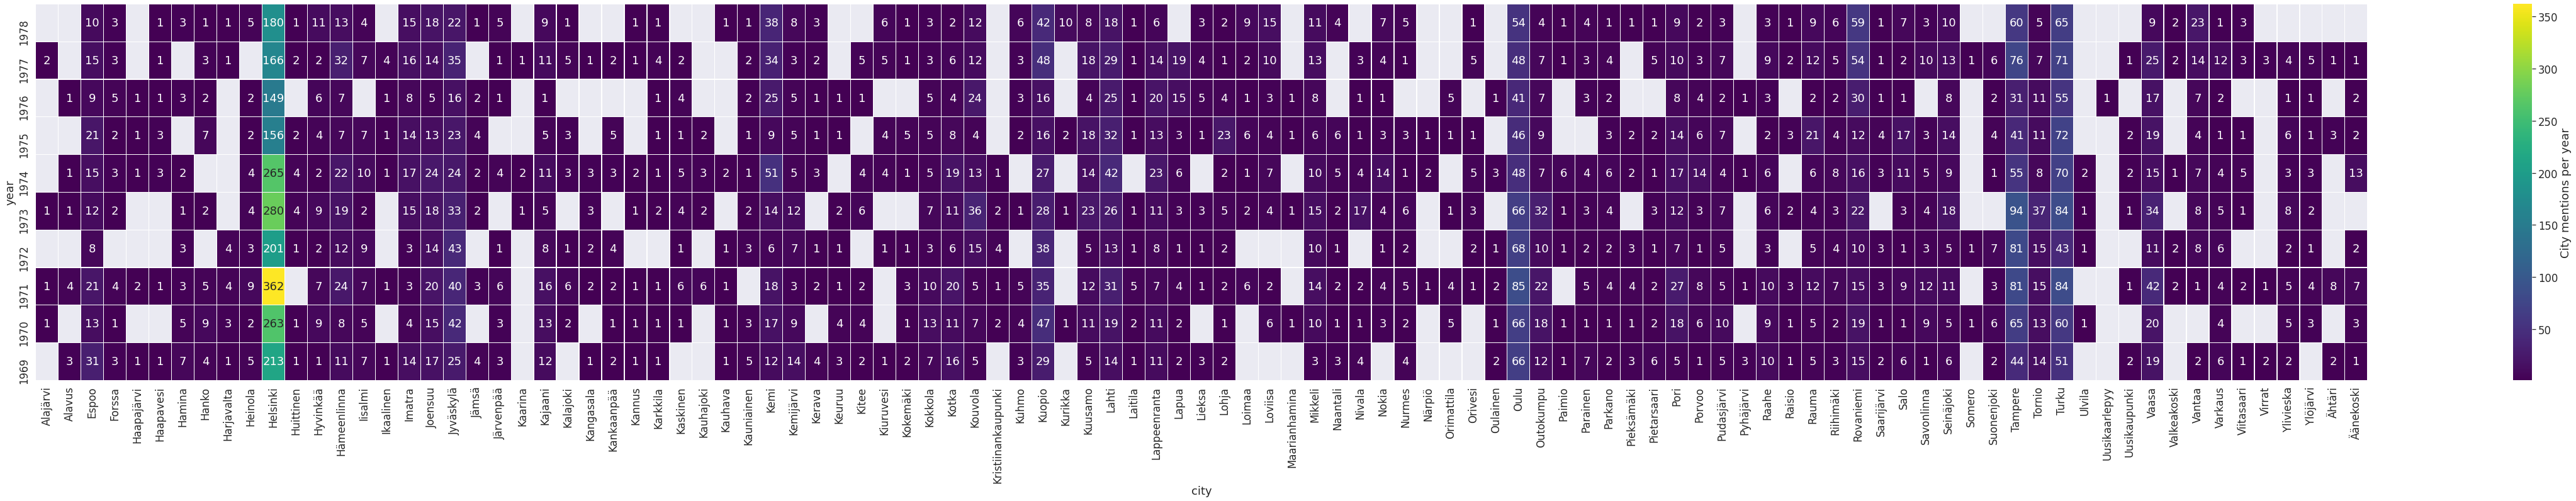

In [ ]:
# CREATE CITY MENTIONS PER YEAR HEATMAP

pivoted= df.pivot(index='year', columns='city', values='mention_count')
pivoted.sort_index(level=0, ascending=False, inplace=True)

fig2, ax2 = plt.subplots(figsize=(83, 11)) 
sns.heatmap(pivoted, annot=True, cmap='viridis',
            linewidths=0.2, ax=ax2, fmt='g',
            cbar_kws={'label': 'City mentions per year'})

In [ ]:
from rdflib.namespace import XSD

DATATYPECONVERTERS = {
      str(XSD.integer):  int,
      str(XSD.decimal):  float,
      str(XSD.date):     lambda v: datetime.strptime(v, '%Y-%m-%d').date()
  }

def convertDatatype(obj):
  return DATATYPECONVERTERS.get(obj.get('datatype'), str)(obj.get('value')) 

def JSON2Pandas(results):
    res = results["results"]["bindings"]
    data = [dict([(k, convertDatatype(v)) for k,v in r.items()]) for r in res]
    return pd.DataFrame(data)

In [ ]:
# Find the speaker's electoral district

query_base= """
PREFIX bioc: <http://deductions.github.io/biological-collections.owl.ttl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX semparls: <http://ldf.fi/schema/semparl/>
prefix bioc: <http://ldf.fi/schema/bioc/>
prefix crm: <http://erlangen-crm.org/current/>

SELECT ?person ?group ?label WHERE {
  VALUES ?person { <SPEAKER_ID> }
  VALUES ?date { "SPEECH_DATE"^^xsd:date }
  ?person
  		skos:prefLabel ?name ;
    	bioc:bearer_of ?role .
  ?role
    	crm:P11i_participated_in ?membership .
  ?membership crm:P4_has_time_span ?timespan .
  ?timespan crm:P81a_begin_of_the_begin ?begin.
  FILTER(?date >= ?begin)
  OPTIONAL{?timespan crm:P82b_end_of_the_end ?end .
    FILTER(?date <=?end) }
  ?membership
    	semparls:organization ?group .
  ?group a semparls:ElectoralDistrict  .
  ?group skos:prefLabel ?label 
  FILTER (lang(?label) = 'fi') .    
}"""

authorization = getpass.getpass('Password:') 

speaker_electoral_district = []
sparql3 = SPARQLWrapper("http://ldf.fi/semparl/sparql")

for index, row in mentions.iterrows():
  query = query_base.replace('SPEAKER_ID', row['puhuja_id'])
  query = query.replace('SPEECH_DATE', row['päiväys'])
  sparql3.setQuery(query)
  sparql3.setReturnFormat(JSON)
  sparql3.addCustomHttpHeader("Authorization", authorization)
  results = sparql3.query().convert()
  link_data = JSON2Pandas(results)
  try:
    speaker_electoral_district.append([row['päiväys'][:4],row['kaupunki'], link_data.iloc[0]['label']])
  except:
    print(row['puhuja_id'], results)

print(speaker_electoral_district[:30])


In [ ]:
from statistics import mean

# SENTIMENT ANALYSIS

sentiment_pd_empty_rows = pd.read_csv('./city_mentions_all_cities_periods-SENTS_output_FINAL.csv', sep=",")
sentiment_pd = sentiment_pd_empty_rows.dropna()

stats = {}

for index, row in sentiment_pd.iterrows():
    city = row['city'] 
    year =row['date'][:4]
    if not city in stats:
        stats[city] = {}
    if not year in stats[city]:
        stats[city][year] = {'rows': 0, 'sentiment_words': 0, 'sentiment': []}
    stats[city][year]['rows'] = stats[city][year]['rows'] + 1
    stats[city][year]['sentiment_words'] = stats[city][year]['sentiment_words'] + int(row['num_of_FEIL_words'])
    stats[city][year]['sentiment'].append(row['nrmlzd_sent']) 

#pprint(stats)
sentiment_csv = []
for city in stats:
  for year in stats[city]:
    avg = mean(stats[city][year]['sentiment'])
    sentiment_csv.append([city, year, stats[city][year]['rows'], stats[city][year]['sentiment_words'], avg ])


#pprint(sentiment_csv)

sentiment_pd=pd.DataFrame(sentiment_csv, columns=['city', 'year', 'rows', 'sentiment_words', 'sentiment_avg'])
display(sentiment_pd)



,city,year,rows,sentiment_words,sentiment_avg
0,Helsinki,1988,1974,4798,0.052116
1,Helsinki,1990,1236,3686,0.060945
2,Helsinki,1994,663,1815,0.057670
3,Helsinki,1989,1480,3868,0.055867
4,Helsinki,1992,716,1793,0.053971
...,...,...,...,...,...
2536,Sastamala,2008,1,0,0.000000
2537,Mänttä-Vilppula,2011,16,22,0.023187
2538,Mänttä-Vilppula,2012,19,37,0.036972
2539,Mänttä-Vilppula,2013,8,25,0.047839


In [ ]:
sentiment_cut = sentiment_pd[sentiment_pd['sentiment_avg'] > 0]
#display(sentiment_cut)

sentiment_cut = sentiment_pd[(sentiment_pd['sentiment_avg'] > 0) & (sentiment_pd['sentiment_words'] > 5)]
a= sentiment_cut.sort_values(['year', 'city'], ascending=[True, True])
display(a)

a.to_csv('city_sentiment_stats_all.csv', index=False)


,city,year,rows,sentiment_words,sentiment_avg
1736,Alavus,1969,7,8,0.017333
40,Espoo,1969,114,290,0.044248
1410,Forssa,1969,3,9,0.093740
1254,Hamina,1969,61,157,0.046266
2080,Hanko,1969,8,31,0.061968
...,...,...,...,...,...
2440,Viitasaari,2013,10,28,0.042694
2378,Virrat,2013,6,23,0.054418
891,Ylöjärvi,2013,3,9,0.089143
2461,Ähtäri,2013,8,23,0.082095


In [ ]:
files.download('./city_sentiment_stats_all.csv')

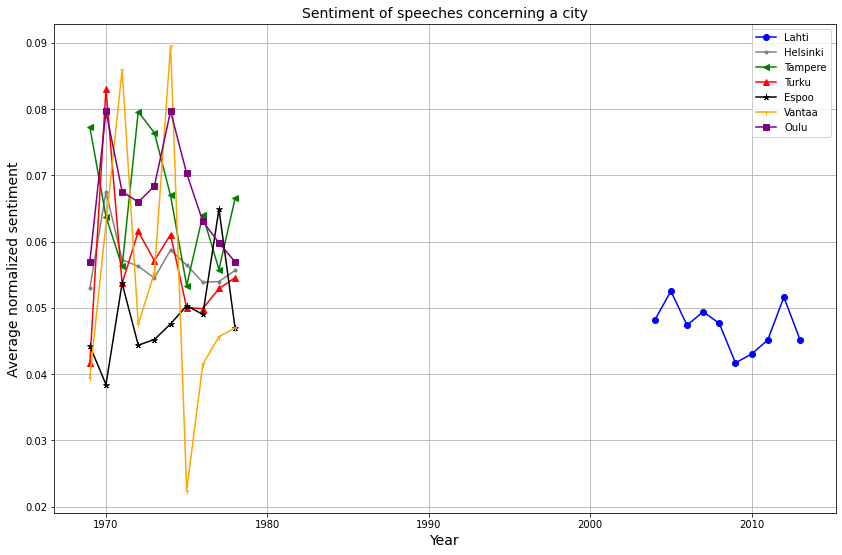

In [ ]:
df = pd.read_csv('./city_sentiment_stats_all.csv', sep=",")


dfl = df[(df['city']=='Lahti') & (df['year'] > 2000)]
dfh = df[(df['city']=='Helsinki') & (df['year'] < 1979)]
dft = df[(df['city']=='Tampere') & (df['year'] < 1979)]

dftu = df[(df['city']=='Turku') & (df['year'] < 1979)]
dfe = df[(df['city']=='Espoo') & (df['year'] < 1979)]
dfv = df[(df['city']=='Vantaa') & (df['year'] < 1979)]
dfo = df[(df['city']=='Oulu') & (df['year'] < 1979)]


plt.figure(figsize=(14, 9))
plt.plot(dfl['year'], dfl['sentiment_avg'], color='blue', marker='o')
plt.plot(dfh['year'], dfh['sentiment_avg'], color='gray', marker='.')
plt.plot(dft['year'], dft['sentiment_avg'], color='green', marker='<')
plt.plot(dftu['year'], dftu['sentiment_avg'], color='red', marker='^')
plt.plot(dfe['year'], dfe['sentiment_avg'], color='black', marker=(5,2))
plt.plot(dfv['year'], dfv['sentiment_avg'], color='orange', marker="1")
plt.plot(dfo['year'], dfo['sentiment_avg'], color='purple', marker="s")
plt.legend(["Lahti", "Helsinki", "Tampere", "Turku", "Espoo", "Vantaa", "Oulu"])

plt.title('Sentiment of speeches concerning a city', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average normalized sentiment', fontsize=14)


plt.grid(True)
plt.show()


In [ ]:
labels = ['1969-1978', '1986-1995', '2004-2013']
gathered = [9405, 14864, 21101]
unique_gathered =[5680,9413,13946]
all = [113931, 135427, 160909]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gathered, width, label='Extracted rows')
rects2 = ax.bar(x + width/2, unique_gathered, width, label='Extracted unique speeches')
rects3 = ax.bar(x + width, all, width, label='All speeches')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of speeches')
ax.set_title('Time period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()